In [10]:
import pandas as pd

df = pd.read_csv("C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/FlightDelayCancellation/src/semi_clean_data.csv")
df.head()

C:\Users\Alperen Arda\AppData\Local\Temp\ipykernel_3336\1083158206.py:3: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Alperen Arda/OneDrive/Desktop/GitHub/FlightDelayCancellation/src/semi_clean_data.csv")


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,...,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,...,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,1,1,4,US,840,N171US,SFO,CLT,20,18.0,...,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,...,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,...,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [16]:
df['TAXI_OUT'][50:70]

50     9.0
51    11.0
52    24.0
53    15.0
54    12.0
55    22.0
56    10.0
57    19.0
58    12.0
59    16.0
60    10.0
61    23.0
62    14.0
63    16.0
64    37.0
65    21.0
66    15.0
67    15.0
68    14.0
69    12.0
Name: TAXI_OUT, dtype: float64

In [18]:
df['TAXI_OUT'].min()

np.float64(1.0)

In [29]:
bins = [-40, 0, 40, 80, 120, 160]
labels = ['Low', 'Medium', 'High', 'Very High', 'Ultra']
df['cat_taxi'] = pd.cut(df['TAXI_OUT'], bins=bins, labels=labels)

<Axes: xlabel='Category', ylabel='Count'>

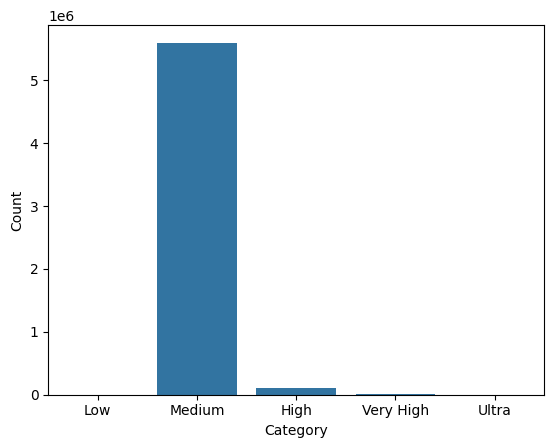

In [30]:
import seaborn as sns

category_counts = df['cat_taxi'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']  # Kolon isimlerini düzenle

sns.barplot(x=category_counts['Category'], y=category_counts['Count'])